# This notebook is to explore various prediction models from the Used Car Price data at : https://www.kaggle.com/CooperUnion/cardataset
Various Regression techniques are explored, like LinearRegression, RandomForestRegression, with K-fold cross validation, grid search of parameters, finally Deep Learning techniques, XGBoost is used and the best accuracy is shown. However the LinearRegression model is exposed as WebService, due to certain technical limitations faced in exposing the other models.

In [1]:
#Import all necessary libraries
import pickle
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from keras.models import Sequential
from keras.layers import Dense   
from keras import optimizers

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Read the pre-processed pkl files

In [2]:
train_X=pd.read_pickle('C:/users/hackuser1/train_X_ordUSJap.pkl')
test_X=pd.read_pickle('C:/users/hackuser1/test_X_ordUSJap.pkl')
train_Y=pd.read_pickle('C:/users/hackuser1/train_Y_ordUSJap.pkl') # train Y with log(MSRP)
test_Y=pd.read_pickle('C:/users/hackuser1/test_Y_ordUSJap.pkl')
train_Y_orig=pd.read_pickle('C:/users/hackuser1/train_Y_ord_origUSJap.pkl') # train Y with MSRP unmodified
test_Y_orig=pd.read_pickle('C:/users/hackuser1/test_Y_ord_origUSJap.pkl')

train_X_make=pd.read_pickle('C:/users/hackuser1/train_X_ord_makeUSJap.pkl')
test_X_make=pd.read_pickle('C:/users/hackuser1/test_X_ord_makeUSJap.pkl')

print(train_X.shape)
print(train_X_make.shape)

(3770, 45)
(3770, 55)


# Linear Regression

We fit Sklearn LinearRegression and use this to make predictions on the test data and check the RMSE
Use train X data with make and without make, and Test Y as MSRP as well as Log MSRP and compare the RMSE values on test data

In [3]:
#fit train data without make info, and log MSRP
lin_reg = LinearRegression()
lin_reg.fit(train_X, train_Y)

#fit train data without make and MSRP, as it
lin_reg_1 = LinearRegression()
lin_reg_1.fit(train_X, train_Y_orig)

#fit train data with make and log MSRP
lin_reg_make = LinearRegression()
lin_reg_make.fit(train_X_make, train_Y)

#fit train data with make and MSRP, as it
lin_reg_make1 = LinearRegression()
lin_reg_make1.fit(train_X_make, train_Y_orig)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
carSales_predictions = lin_reg.predict(test_X)
lin_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
lin_rmse = np.sqrt(lin_mse)
print("rmse without make, log MSRP:"+str(lin_rmse))

carSales_predictions = lin_reg_1.predict(test_X)
lin_mse = mean_squared_error(test_Y, carSales_predictions)
lin_rmse = np.sqrt(lin_mse)
print("rmse without make, MSRP, as is:"+str(lin_rmse))

carSales_predictions = lin_reg_make.predict(test_X_make)
lin_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
lin_rmse = np.sqrt(lin_mse)
print("rmse with make, log MSRP:"+str(lin_rmse))

carSales_predictions = lin_reg_make1.predict(test_X_make)
lin_mse = mean_squared_error(test_Y, carSales_predictions)
lin_rmse = np.sqrt(lin_mse)
print("rmse with make, MSRP, as is:"+str(lin_rmse))

rmse without make, log MSRP:8697.552910933056
rmse without make, MSRP, as is:28131.960498267086
rmse with make, log MSRP:8143.611441260607
rmse with make, MSRP, as is:28119.069183775104


We observe the data with make and log MSRP gives best results, as we found in our analysis.
Next we use SGDRegressor from scikit learn and compare the RMSE

In [5]:
sgd_reg_make = SGDRegressor(max_iter=500,penalty=None,eta0=0.01)
sgd_reg_make.fit(train_X_make, train_Y.values.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=500, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [6]:
carSales_predictions_make = sgd_reg_make.predict(test_X_make)
sgd_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions_make))
sgd_rmse = np.sqrt(sgd_mse)
print("SGD RMSE:"+str(sgd_rmse))

SGD RMSE:8120.749907574203


# Decision Tree Regressor

In [7]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_X,train_Y)

tree_reg_make = DecisionTreeRegressor()
tree_reg_make.fit(train_X_make,train_Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [8]:
carSales_predictions = tree_reg.predict(test_X)
tree_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
tree_rmse = np.sqrt(tree_mse)
print("Decision Tree RMSE, without make:"+str(tree_rmse))

Decision Tree RMSE, without make:3238.718707495812


In [9]:
carSales_predictions_make = tree_reg_make.predict(test_X_make)
tree_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions_make))
tree_rmse = np.sqrt(tree_mse)
print("Decision Tree RMSE, with make:"+str(tree_rmse))

Decision Tree RMSE, with make:3233.2408233454767


In [11]:
#Lets print few predicted prices and actual prices
print("predicted prices")
print(np.around(np.exp(carSales_predictions_make[0:5])))
print("actual prices")
print(np.exp(test_Y[0:5]))

predicted prices
[54776. 16101. 16041. 31396. 22351.]
actual prices
         0
0  53951.0
1  18021.0
2  15800.0
3  33726.0
4  22351.0


We find Decision tree with make data included reduces the RMSE and is the best so far. We 
validate this using K-fold Cross validation with k set to 10

In [15]:
scores = cross_val_score(tree_reg_make,train_X_make,train_Y,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

print("scores:",tree_rmse_scores)
print("mean:",tree_rmse_scores.mean())
print("std dev:",tree_rmse_scores.std())

scores: [0.11708385 0.10207571 0.10477421 0.11729753 0.12510775 0.12555303
 0.10951398 0.10181956 0.09865087 0.11174678]
mean: 0.11136232591809854
std dev: 0.009187650938358372


This shows there is a good fit, and there is very less variation between the folds and the data is dependable.
We now try RandomForestRegressor, with default parameters

# RandomForestRegressor

In [13]:
forest_reg_make = RandomForestRegressor()
forest_reg_make.fit(train_X_make,train_Y.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [14]:
carSales_predictions = forest_reg_make.predict(test_X_make)
forest_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
forest_rmse = np.sqrt(forest_mse)
print("Random Forest Regressor RMSE, with make:"+str(forest_rmse))
print("predicted prices")
print(np.around(np.exp(carSales_predictions[0:5])))
print("actual prices")
print(np.exp(test_Y[0:5]))

Random Forest Regressor RMSE, with make:3041.801088913506
predicted prices
[54116. 14352. 16328. 31969. 19529.]
actual prices
         0
0  53951.0
1  18021.0
2  15800.0
3  33726.0
4  22351.0


This is clearly a better fit compared to DecisionTree, and we validate this with k-fold CV

In [16]:
forest_scores = cross_val_score(forest_reg_make,train_X_make,train_Y.values.ravel(),scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

print("scores:",forest_rmse_scores)
print("mean:",forest_rmse_scores.mean())
print("std dev:",forest_rmse_scores.std())

scores: [0.09922983 0.0952579  0.09656832 0.10506228 0.11039031 0.0976549
 0.10930407 0.09504719 0.0937419  0.10298451]
mean: 0.10052411952593734
std dev: 0.005747711143924466


# We now use GridSearch to find the optimum parameters for RandomForestRegression, Please note : the time taken to run this step might exceed few mins

In [3]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_X_make, train_Y.values.ravel())
print("BEST PARAMETERS FOR RANDOM FOREST REGRESSOR IS:")
grid_search.best_params_

BEST PARAMETERS FOR RANDOM FOREST REGRESSOR IS:


{'max_features': 8, 'n_estimators': 30}

In [17]:
#Fit using best parameters and check
forest_reg_make = RandomForestRegressor(max_features=8,n_estimators=30)
forest_reg_make.fit(train_X_make,train_Y.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [19]:
carSales_predictions = forest_reg_make.predict(test_X_make)
forest_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
forest_rmse = np.sqrt(forest_mse)
print("Random Forest Regressor RMSE, with make:"+str(forest_rmse))
print("predicted prices")
print(np.around(np.exp(carSales_predictions_make[0:5])))
print("actual prices")
print(np.exp(test_Y[0:5]))

Random Forest Regressor RMSE, with make:3021.3503852490007
predicted prices
[54776. 16101. 16041. 31396. 22351.]
actual prices
         0
0  53951.0
1  18021.0
2  15800.0
3  33726.0
4  22351.0


The observation is : Default parameters gives better results.

# Feature importance calculation

In [5]:
feature_importances = grid_search.best_estimator_.feature_importances_
num_attribs = ["Age","City MPG","Engine HP"]
categorical_attribs = [  '0.' , ' 3.',   '4.' ,  '5.' ,  '6.',   '8.' , '10.', '12.'] + ['diesel', 'electric' ,'flex-fuel (unleaded/E85)',
 'flex-fuel (unleaded/natural gas)' ,'natural gas', 'premium unleaded (recommended)', 'premium unleaded (required)',
 'regular unleaded'] + ['AUTOMATED_MANUAL' ,'AUTOMATIC' ,'DIRECT_DRIVE' ,'MANUAL', 'UNKNOWN'] + ['all wheel drive','four wheel drive', 'front wheel drive', 'rear wheel drive'] + ['Compact' ,'Large', 'Midsize']+['2dr Hatchback', '2dr SUV' ,'4dr Hatchback', '4dr SUV', 'Cargo Minivan',
 'Cargo Van', 'Convertible', 'Convertible SUV' ,'Coupe', 'Crew Cab Pickup','Extended Cab Pickup' ,'Passenger Minivan' ,'Passenger Van','Regular Cab Pickup', 'Sedan' ,'Wagon']+['Chevrolet', 'Chrysler', 'Dodge', 'FIAT' ,'Ford', 'Honda', 'Hyundai', 'Kia', 'Mazda' ,'Mitsubishi' ,'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac' ,'Scion', 'Subaru','Suzuki', 'Volkswagen']
attributes = num_attribs+categorical_attribs
print(sorted(zip(feature_importances, attributes), reverse=True))

[(0.5100526306037266, 'Age'), (0.1534512752209078, 'Engine HP'), (0.07158462721913779, 'AUTOMATIC'), (0.040736069556562934, 'premium unleaded (recommended)'), (0.03665579310994976, 'City MPG'), (0.02903693880096793, 'regular unleaded'), (0.01061357237478667, '8.'), (0.010326818602971032, 'rear wheel drive'), (0.008045836119319482, 'Midsize'), (0.007680229664662209, '4.'), (0.007322081376626545, 'UNKNOWN'), (0.007007008706201023, '6.'), (0.0066638839133611304, 'front wheel drive'), (0.006576821902562058, 'flex-fuel (unleaded/natural gas)'), (0.006380370081305418, '2dr SUV'), (0.0062020171505632994, 'diesel'), (0.005311835690842967, 'natural gas'), (0.0049464067542141854, 'Compact'), (0.004801531969932649, 'Sedan'), (0.004736094437282246, 'four wheel drive'), (0.004498534209085308, 'Large'), (0.004407836575933106, 'Convertible SUV'), (0.0043968251702210005, 'all wheel drive'), (0.0036703152262496713, 'Convertible'), (0.0035477761972163195, 'Cargo Minivan'), (0.0034495483906864274, 'Passe

This shows the best predictors are Age, Engine HP,  Transmission, Fuel Type, City MPG, Drive, Size, MAke, Style. We do retain all parameters in the prediction.

In [8]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(test_X_make)
final_mse = mean_squared_error(np.exp(test_Y), np.exp(final_predictions))
final_rmse = np.sqrt(final_mse)
print("Random Forest Regressor Final RMSE:"+str(final_rmse))
print("predicted prices")
print(np.around(np.exp(final_predictions[0:5])))
print("actual prices")
print(np.exp(test_Y[0:5]))


final_model_scores = cross_val_score(final_model,test_X_make,test_Y.values.ravel(),scoring="neg_mean_squared_error",cv=10)
final_model_scores = np.sqrt(-final_model_scores)

print("scores:",final_model_scores)
print("mean:",final_model_scores.mean())
print("std dev:",final_model_scores.std())

Random Forest Regressor Final RMSE:3062.5760296099807
predicted prices
[53727. 13802. 16162. 31318. 21172.]
actual prices
         0
0  53951.0
1  18021.0
2  15800.0
3  33726.0
4  22351.0
scores: [0.16538965 0.1561441  0.16378537 0.15037719 0.17668523 0.12642795
 0.14465081 0.22079662 0.1338269  0.18266771]
mean: 0.16207515346125578
std dev: 0.025775849255976122


We find the model is fitting quite well. We plot the learning curves for the best model and see the learning curve, by plotting the rmse vs size of training set

# This step might take more than few mins

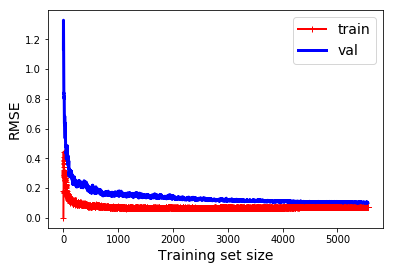

In [30]:
def plot_learning_curves(model, X, y):
    
    train_errors, val_errors = [], []
    for m in range(1, len(X)):
        model.fit(X[:m], y[:m].values.ravel())
        y_train_predict = model.predict(X[:m])
        y_val_predict = model.predict(test_X_make)
        train_errors.append(mean_squared_error(y[:m], y_train_predict))
        val_errors.append(mean_squared_error(test_Y, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)   

plot_learning_curves(final_model, train_X_make, train_Y)
plt.show()

In [9]:
#We try ElasticNet
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(train_X_make, train_Y)
carSales_predictions = elastic_net.predict(test_X_make)
elastic_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
elastic_rmse = np.sqrt(elastic_mse)
print("Elastic Net RMSE:"+str(elastic_rmse))

Elastic Net RMSE:7636.56777784063


In [10]:
#We try Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(train_X_make, train_Y)
carSales_predictions = ridge_reg.predict(test_X_make)
ridge_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
ridge_rmse = np.sqrt(ridge_mse)
print("Ridge RMSE:"+str(ridge_rmse))

Ridge RMSE:8119.760346751878


In [11]:
#We try Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(train_X_make, train_Y)
carSales_predictions = lasso_reg.predict(test_X_make)
lasso_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
lasso_rmse = np.sqrt(lasso_mse)
print("Lasso RMSE:"+str(lasso_rmse))

Lasso RMSE:7789.776041245896


We find these give worse results. 
We use GradientBoostingRegressor from sklearn finally

# Gradient Boosting Regressor

In [12]:
gbrt = GradientBoostingRegressor(max_depth=8, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(train_X_make, train_Y.values.ravel())
carSales_predictions = gbrt.predict(test_X_make)
gbrt_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
gbrt_rmse = np.sqrt(gbrt_mse)
print("Gradient Boosting Regressor RMSE:"+str(gbrt_rmse))

Gradient Boosting Regressor RMSE:3128.180285479744


In [13]:
gbrt_slow = GradientBoostingRegressor(max_depth=30, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(train_X_make, train_Y.values.ravel())
carSales_predictions = gbrt_slow.predict(test_X_make)
gbrt_slow_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
gbrt_slow_rmse = np.sqrt(gbrt_slow_mse)
print("Gradient Boosting Regressor SLOW RMSE:"+str(gbrt_slow_rmse))

Gradient Boosting Regressor SLOW RMSE:3226.210691278335


# Grid Search. This step might take more than a few mins

In [29]:
param_grid = [
    # try 2 (2×2) combinations of hyperparameters
    {'n_estimators': [100,200], 'max_depth': [20, 30]},
    # then try 6 (2×3) combinations with bootstrap set as False
    #{'bootstrap': [False], 'n_estimators': [100,200], 'max_depth': [20, 30, 40]},
  ]

gbrt_reg = GradientBoostingRegressor(random_state=42, learning_rate=0.1)
# train across 5 folds, that's a total of (4)*5=20 rounds of training 
grid_search_gbrt = GridSearchCV(gbrt_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search_gbrt.fit(train_X_make, train_Y.values.ravel())
print("BEST PARAMETERS FOR GRADIENT BOOSTING REGRESSOR IS:")
grid_search_gbrt.best_params_

BEST PARAMETERS FOR GRADIENT BOOSTING REGRESSOR IS:


{'max_depth': 20, 'n_estimators': 100}

In [14]:
gbrt_slow = GradientBoostingRegressor(max_depth=20, n_estimators=100, learning_rate=0.1, random_state=42)
gbrt_slow.fit(train_X_make, train_Y.values.ravel())
carSales_predictions = gbrt_slow.predict(test_X_make)
gbrt_slow_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
gbrt_slow_rmse = np.sqrt(gbrt_slow_mse)
print("Gradient Boosting Regressor BEST RMSE:"+str(gbrt_slow_rmse))

Gradient Boosting Regressor BEST RMSE:3226.300535137285


# Deep Learning technique. We use keras with tensorflow backend and then repeat the same with cntk backend. (might take  few mins to run)

In [3]:
model = Sequential()

#We use two hidden layers with 50 and 30 units with Relu activation, and no activation in the output layer, since 
#we want to predict the car price.
model.add(Dense(50,input_dim=(train_X_make.shape[1]),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                2800      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 4,361
Trainable params: 4,361
Non-trainable params: 0
_________________________________________________________________


In [4]:
myOptimizer = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=0.01, decay=0.0)
model.compile(loss='mean_squared_error', optimizer=myOptimizer, metrics=['mse'])
history = model.fit(train_X_make, train_Y, epochs=200,  validation_data=(test_X_make,test_Y), batch_size=5, verbose=0)

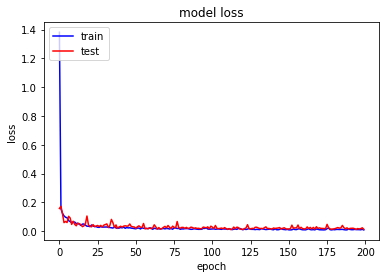

In [17]:
plt.plot(history.history['loss'], color = 'blue')
plt.plot(history.history['val_loss'], color=  'red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [5]:
carSales_predictions = model.predict(test_X_make)
dl_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
dl_rmse = np.sqrt(dl_mse)
print("Deep Learning RMSE with two hidden layers:"+str(dl_rmse))

Deep Learning RMSE with two hidden layers:2995.5664180906433


We try 3 hidden layers and attempt to fit the problem better

In [19]:
model = Sequential()
model.add(Dense(50,input_dim=(train_X_make.shape[1]),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                2800      
_________________________________________________________________
dense_5 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 4,041
Trainable params: 4,041
Non-trainable params: 0
_________________________________________________________________


In [20]:
myOptimizer = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=0.01, decay=0.0)
model.compile(loss='mean_squared_error', optimizer=myOptimizer, metrics=['mse'])
history = model.fit(train_X_make, train_Y, epochs=300,  validation_data=(test_X_make,test_Y), batch_size=10, verbose=0)

In [22]:
carSales_predictions = model.predict(test_X_make)
dl_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
dl_rmse = np.sqrt(dl_mse)
print("Deep Learning RMSE with three hidden layers:"+str(dl_rmse))

Deep Learning RMSE with three hidden layers:3766.2983595945766


In [10]:
model = Sequential()
model.add(Dense(20,input_dim=(train_X_make.shape[1]),activation='relu'))
model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 20)                1320      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 21        
Total params: 1,341
Trainable params: 1,341
Non-trainable params: 0
_________________________________________________________________


In [11]:
myOptimizer = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=0.01, decay=0.0)
model.compile(loss='mean_squared_error', optimizer=myOptimizer, metrics=['mse'])
history = model.fit(train_X_make, train_Y, epochs=200,  validation_data=(test_X_make,test_Y), batch_size=10, verbose=0)

In [12]:
carSales_predictions = model.predict(test_X_make)
dl_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
dl_rmse = np.sqrt(dl_mse)
print("Deep Learning RMSE with one hidden layer:"+str(dl_rmse))

Deep Learing RMSE with one hidden layer:3934.8550403


We now try XGBRegressor, a latest technique. We start by default setting and then use best parameter for n_estimator by trying number of values

In [6]:
xgb_model = XGBRegressor() 
xgb_model.fit(train_X_make, train_Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [7]:
carSales_predictions = xgb_model.predict(test_X_make)
xgb_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
xgb_rmse = np.sqrt(xgb_mse)
print("XGB RMSE:"+str(xgb_rmse))

XGB RMSE:3316.48372818906


In [8]:
xgb_model = XGBRegressor(n_estimators=350) 
xgb_model.fit(train_X_make, train_Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=350,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [9]:
carSales_predictions = xgb_model.predict(test_X_make)
xgb_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
xgb_rmse = np.sqrt(xgb_mse)
print("XGB RMSE, with n_estmators=350:"+str(xgb_rmse))

XGB RMSE, with n_estmators=350:2902.7262631072244


In [10]:
xgb_model = XGBRegressor(n_estimators=350, max_depth=5) 
xgb_model.fit(train_X_make, train_Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=350,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [11]:
carSales_predictions = xgb_model.predict(test_X_make)
xgb_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
xgb_rmse = np.sqrt(xgb_mse)
print("XGB RMSE, with n_estmators=350,max_depth=5:"+str(xgb_rmse))

XGB RMSE, with n_estmators=350,max_depth=5:2719.4687601824203


In [12]:
xgb_model = XGBRegressor(n_estimators=350, max_depth=10) 
xgb_model.fit(train_X_make, train_Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=350,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [13]:
carSales_predictions = xgb_model.predict(test_X_make)
xgb_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
xgb_rmse = np.sqrt(xgb_mse)
print("XGB RMSE, with n_estmators=350,max_depth=10:"+str(xgb_rmse))

XGB RMSE, with n_estmators=350,max_depth=10:3090.637282830599


We conclude the setting of n_estimators=350 and max_depth=5 works best in this case, and this model is the best amongst all the models compared.

We now calculate and display feature importances from the XGBoost model 

[0.2109408  0.15272114 0.2217691  0.00731261 0.00112502 0.00337505
 0.         0.01054704 0.00140627 0.00140627 0.         0.00857826
 0.00646885 0.00407819 0.00295317 0.0046407  0.00900014 0.00435944
 0.01926593 0.0015469  0.00942202 0.00492195 0.01195331 0.01378147
 0.00675011 0.0092814  0.01743777 0.01096892 0.01307833 0.00717199
 0.00281254 0.00857826 0.01631276 0.00562509 0.00450007 0.01364084
 0.0046407  0.01209394 0.0098439  0.0129377  0.00590634 0.00604697
 0.00914077 0.01462523 0.00632822 0.01884404 0.00407819 0.0092814
 0.00675011 0.00857826 0.00956265 0.01673464 0.00857826 0.00323443
 0.00506258]


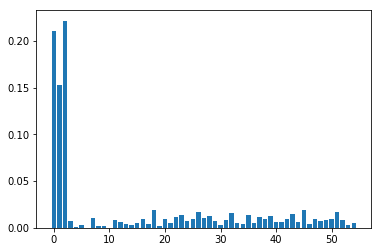

In [14]:
xgb_model = XGBRegressor(n_estimators=350, max_depth=5) 
xgb_model.fit(train_X_make, train_Y)
print(xgb_model.feature_importances_)
# plot
plt.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
plt.show()

We see that the numerical features, Engine HP, Age, City MPG has the highest importances, followed by categorical features. Among the categorical
features we find the Engine Cylinder, and Engine Fuel Type has lease importance. Transmission type, and Size, and Make have high importances. We drop the Engine Cylinder from Train and Test data and fit our model again.

We recall the order of Categorical variables is : 
      [ 0.  3.  4.  5.  6.  8. 10. 12.]
['diesel' 'electric' 'flex-fuel (unleaded/E85)'
 'flex-fuel (unleaded/natural gas)' 'natural gas'
 'premium unleaded (recommended)' 'premium unleaded (required)'
 'regular unleaded']
['AUTOMATED_MANUAL' 'AUTOMATIC' 'DIRECT_DRIVE' 'MANUAL' 'UNKNOWN']
['all wheel drive' 'four wheel drive' 'front wheel drive'
 'rear wheel drive']
['Compact' 'Large' 'Midsize']
['Chevrolet' 'Chrysler' 'Dodge' 'FIAT' 'Ford' 'Honda' 'Hyundai' 'Kia'
 'Mazda' 'Mitsubishi' 'Nissan' 'Oldsmobile' 'Plymouth' 'Pontiac' 'Scion'
 'Subaru' 'Suzuki' 'Volkswagen']
['2dr Hatchback' '2dr SUV' '4dr Hatchback' '4dr SUV' 'Cargo Minivan'
 'Cargo Van' 'Convertible' 'Convertible SUV' 'Coupe' 'Crew Cab Pickup'
 'Extended Cab Pickup' 'Passenger Minivan' 'Passenger Van'
 'Regular Cab Pickup' 'Sedan' 'Wagon']

In [15]:
print(train_X_make.shape[1])
train_X_make_upd = np.delete(train_X_make,[4,5,6,7,8,9,10,11],1) # we drop the 8 columns after the first 6 numeric ones
print(train_X_make_upd.shape[1])

55
47


In [16]:
test_X_make_upd = np.delete(test_X_make,[4,5,6,7,8,9,10,11],1)

In [17]:
xgb_model = XGBRegressor(n_estimators=350, max_depth=5) 
xgb_model.fit(train_X_make_upd, train_Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=350,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [19]:
carSales_predictions = xgb_model.predict(test_X_make_upd)
xgb_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
xgb_rmse = np.sqrt(xgb_mse)
print("XGB RMSE, with n_estmators=350,max_depth=5:"+str(xgb_rmse))

XGB RMSE, with n_estmators=350,max_depth=5:2724.7908500066565


We find removing the Engine cylinder categorical variable, does not have any effect on the model. We now try removing the Engine fuel type categorical variable

In [20]:
print(train_X_make.shape[1])
train_X_make_upd1 = np.delete(train_X_make,[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],1) # we drop the 8 columns after the first 3 numeric ones
print(train_X_make_upd1.shape[1])

55
39


In [21]:
test_X_make_upd1 = np.delete(test_X_make,[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],1)

In [22]:
xgb_model = XGBRegressor(n_estimators=350, max_depth=5) 
xgb_model.fit(train_X_make_upd1, train_Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=350,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [23]:
carSales_predictions = xgb_model.predict(test_X_make_upd1)
xgb_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
xgb_rmse = np.sqrt(xgb_mse)
print("XGB RMSE, with n_estmators=350,max_depth=5:"+str(xgb_rmse))

XGB RMSE, with n_estmators=350,max_depth=5:2724.8527067685272


In [ ]:
We find removing the Engine Fuel Type categorical variable, has no effect on accuracy. 
We decide to drop the Engine Cylinder, and retain Engine Fuel Type based on this analysis from our original set of parameters.

In [ ]:
So our final model has the numerical parameters :log Engine HP, Age of Car, log City MPG
and the categorical parameters : Engine Fuel Type,Transmission Type, Driven Wheels, Vehicle Size, Vehicle Style and Make

In [24]:
# save model to file
pickle.dump(xgb_model, open("C:/users/hackuser1/carsales_xgb.pickle.dat", "wb"))


In [3]:
# load model from file
loaded_model = pickle.load(open("C:/users/hackuser1/carsales_xgb.pickle.dat", "rb"))